In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, backend
from tensorflow.keras.layers import Activation
import numpy as np
from math import *
import matplotlib.pyplot as plt


In [2]:
x = int(input("enter the number of features to be generated :"))
y = int(input("enter the number of features to be generated :"))


In [3]:
def create_data(x,y = 1):
    X = np.random.randn(1000, x)
    if y == 1:
        y = np.random.randn(1000, y) #for regression to have a single output
    else:
        y = np.random.randint(0, y, size=(1000, 1)) # to have a value between [0-y) for classification purpous
    return X, y


In [4]:
#we use tensorflow operation as we work in tensorflow so we cannot use direct mathamatical operations
def relu(x):
    return tf.maximum(0.0, x)     #max(0.0, x)

def leaky_relu(x, alpha=0.01):
    return  tf.where(x > 0, x, alpha * x)    #x if x >0 else alpha*x

def tanh(x):
    res = tf.exp(x) - tf.exp(-x)
    res /= tf.exp(x) + tf.exp(-x)
    return res

def sigmoid(x):
    return 1/(1 + tf.exp(-x))

def elu(x, alpha = 0.005):
    return tf.where(x>0, x, alpha*(tf.exp(x) - 1))     #x if x > 0 else alpha*(exp(x) - 1)

def rand_Activation_function(x): #To randomly assign a activation function to the hidden layers
    activations = [relu(x), leaky_relu(x), tanh(x), sigmoid(x),elu(x)]
    i = np.random.randint(0, 5)  
    return activations[i]


In [5]:
def create_model(x,y):
    if y == 1:
        out_layer = layers.Dense(1,activation='sigmoid') # to have a single unit output
    else:
        out_layer = layers.Dense(y, activation='softmax') #used for classification output
    model = models.Sequential([
        layers.Dense(50, activation=Activation(rand_Activation_function), input_shape=(x,)),
        layers.Dropout(.5),
        layers.Dense(25, activation=Activation(rand_Activation_function)),
        layers.Dropout(.2),
        out_layer
    ])

    return model


In [6]:
def train_model(model, optimizer, X, y, batch_size, epochs, optimizer_name):
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  history = []

  for epoch in range(epochs):
    hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
    loss = hist.history['loss'][0]
    history.append(loss)
    print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} Loss:{loss:.4f}")

  return history


In [7]:
X_data, y_data = create_data(x,y)
model_sgd = create_model(x,y)
model_adam = create_model(x,y)

#as both model follow the same summary
model_adam.summary()


d:\applications\programs\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │           550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
optimizer_sgd = optimizers.SGD(learning_rate = 0.01)
optimizer_adam = optimizers.Adam(learning_rate = 0.001)

epochs = 50
batch_size = 32


In [9]:
print("\nTraining with SGD optimizer:")
sgd_loss = train_model(model_sgd, optimizer_sgd, X_data, y_data, batch_size, epochs, 'SGD')

print("\nTraining with Adam optimizer:")
adam_loss = train_model(model_adam, optimizer_adam, X_data, y_data, batch_size, epochs, 'Adam')



Training with SGD optimizer:
Epoch 1/50 - SGD Loss:1.2791
Epoch 2/50 - SGD Loss:1.1872
Epoch 3/50 - SGD Loss:1.1251
Epoch 4/50 - SGD Loss:1.0890
Epoch 5/50 - SGD Loss:1.0702
Epoch 6/50 - SGD Loss:1.0435
Epoch 7/50 - SGD Loss:1.0398
Epoch 8/50 - SGD Loss:1.0312
Epoch 9/50 - SGD Loss:1.0379
Epoch 10/50 - SGD Loss:1.0364
Epoch 11/50 - SGD Loss:1.0208
Epoch 12/50 - SGD Loss:1.0325
Epoch 13/50 - SGD Loss:1.0231
Epoch 14/50 - SGD Loss:1.0220
Epoch 15/50 - SGD Loss:1.0226
Epoch 16/50 - SGD Loss:1.0248
Epoch 17/50 - SGD Loss:1.0188
Epoch 18/50 - SGD Loss:1.0182
Epoch 19/50 - SGD Loss:1.0163
Epoch 20/50 - SGD Loss:1.0221
Epoch 21/50 - SGD Loss:1.0219
Epoch 22/50 - SGD Loss:1.0149
Epoch 23/50 - SGD Loss:1.0138
Epoch 24/50 - SGD Loss:1.0141
Epoch 25/50 - SGD Loss:1.0107
Epoch 26/50 - SGD Loss:1.0097
Epoch 27/50 - SGD Loss:1.0166
Epoch 28/50 - SGD Loss:1.0145
Epoch 29/50 - SGD Loss:1.0108
Epoch 30/50 - SGD Loss:1.0093
Epoch 31/50 - SGD Loss:1.0077
Epoch 32/50 - SGD Loss:1.0129
Epoch 33/50 - SGD L

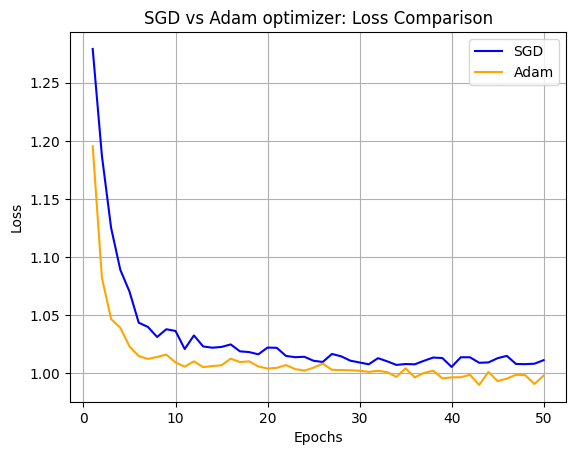

In [10]:
plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()
